# Simple Linear Regression

# Q1

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [128]:
data=pd.read_csv("delivery_time.csv")
data


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [131]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

D:\DS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


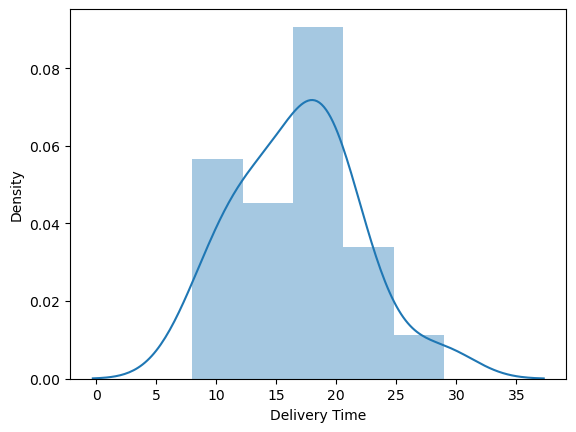

In [7]:
sns.distplot(data.delivery_time,label='Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Density')
plt.show()

D:\DS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


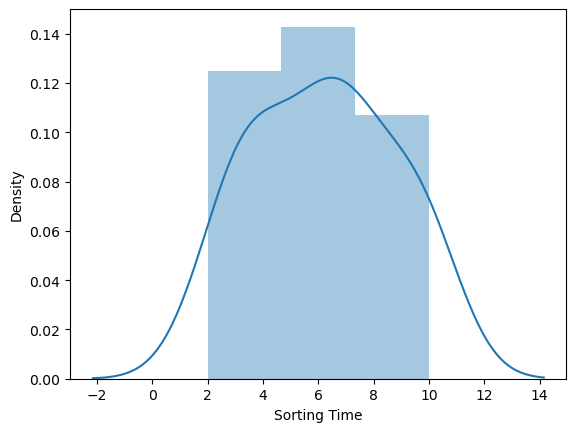

In [8]:
sns.distplot(data.sorting_time,label='Sorting Time')
plt.xlabel('Sorting Time')
plt.ylabel('Density')
plt.show()

# Correlation Analysis

In [9]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


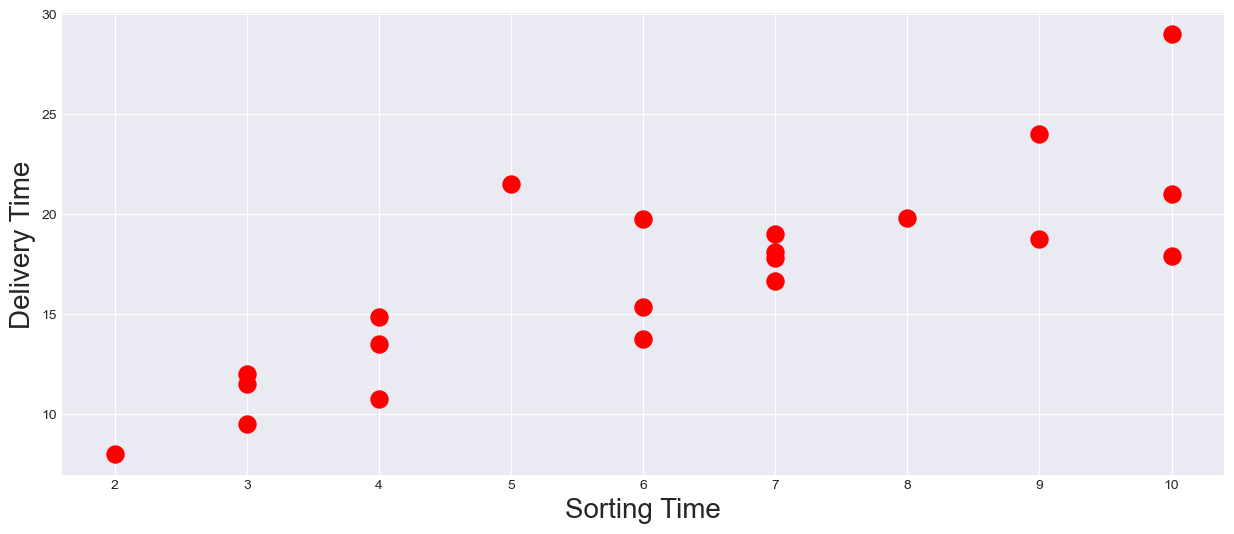

In [10]:
plt.figure(figsize=(15,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data.sorting_time,data.delivery_time,s=150,color="red")
plt.xlabel("Sorting Time",size=20)
plt.ylabel("Delivery Time",size=20)
plt.show()

# Model

In [68]:
model=LinearRegression()
model.fit(data[['sorting_time']],data['delivery_time'])

LinearRegression()

In [69]:
pred=model.predict(data[['sorting_time']]) # predicted data for 
pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [70]:
model.coef_ # m value

array([1.6490199])

In [71]:
model.intercept_ # c value


6.58273397199706

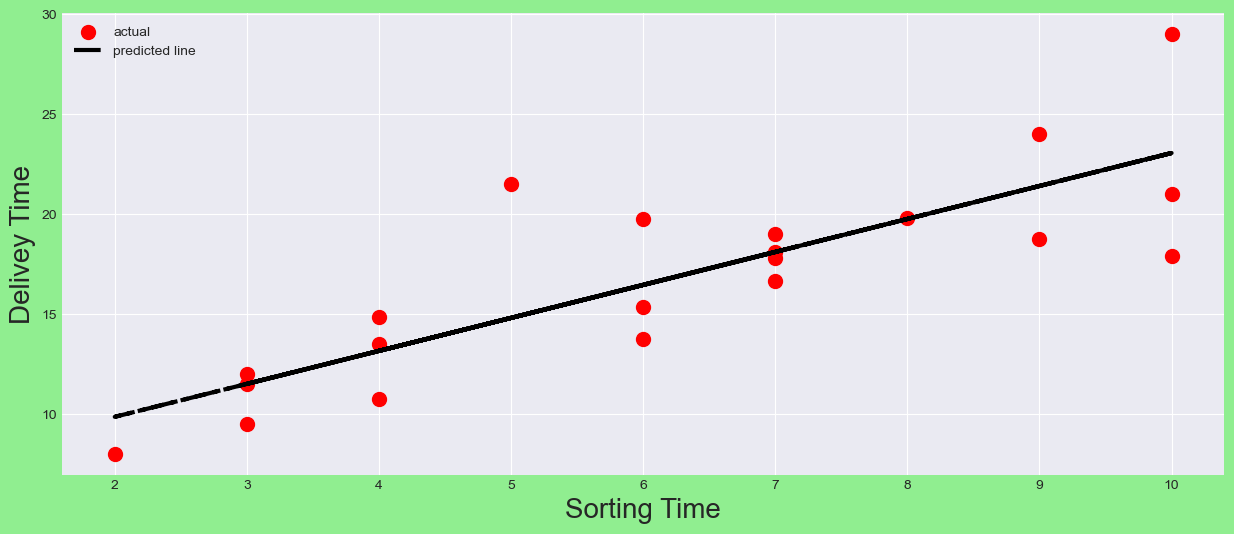

In [60]:
plt.figure(figsize=(15,6),facecolor="lightgreen")

plt.style.use("seaborn-darkgrid")
plt.scatter(data.sorting_time,data.delivery_time,s=100,color="red",label="actual")
plt.plot(data.sorting_time,pred,color="black",linestyle="-.",linewidth=3,label="predicted line") #plotting using predicted data

plt.legend(loc="best")
plt.xlabel("Sorting Time",size=20)
plt.ylabel("Delivey Time",size=20)
plt.show()

# Evaluation

In [61]:
r2_score(data["delivery_time"],pred) # r2 is not close to 0 or 1 so need to do improvement

0.6822714748417231

# Statsmodel

In [77]:
X=data['sorting_time'].values.reshape(-1,1)
y=data['delivery_time'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
pred_reg=LinearRegression()

# Model_1 

In [36]:
# no transformation
model1=smf.ols("delivery_time~sorting_time",data=data).fit()


In [37]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        11:41:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
X=data['sorting_time'].values.reshape(-1,1)
y=data['delivery_time'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
pred_reg=LinearRegression()

In [79]:
pred_reg.fit(X_train,y_train)

LinearRegression()

In [80]:
pred_reg.intercept_

array([4.68229796])

In [81]:
pred_reg.coef_

array([[2.02424455]])

In [82]:
y_pred=pred_reg.predict(X_test)

In [83]:
data_pred=pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
data_pred

,Actual,Predict
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


# Model_2 

In [111]:
# using Logarithmic transformation
model2=smf.ols('np.log(sorting_time)~delivery_time',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 28 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                          16:42:52   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_log = np.log(data['sorting_time'].values.reshape(-1,1))
y_log = data['delivery_time'].values.reshape(-1,1)
X_train_log,X_test_log,Y_train_log,Y_test_log = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

In [99]:
y_pred_log=LinearRegression()

In [100]:
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [101]:
y_pred_log.intercept_

array([-0.31865575])

In [102]:
y_pred_log.coef_

array([[10.09551654]])

In [103]:
l_model= y_pred_log.predict(X_test_log)
l_model

array([[22.92713014],
       [19.32631235],
       [13.6767019 ],
       [13.6767019 ],
       [22.92713014]])

In [104]:
data_pred_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
data_pred_1

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


# Model_3 

In [112]:
#Exponential Transformation Model
#log(Y) =α + βX + ε
model3=smf.ols('np.log(delivery_time)~sorting_time',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 28 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                           16:44:07   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
X_e_log = data['sorting_time'].values.reshape(-1,1)
y_e_log = np.log(data['delivery_time'].values.reshape(-1,1))

In [114]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [115]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [116]:
exp_model.intercept_

array([1.9917351])

In [117]:
exp_model.coef_

array([[0.12920274]])

In [118]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[3.28376247],
       [2.89615425],
       [2.50854604],
       [2.50854604],
       [3.28376247]])

In [119]:
data_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
data_exp

,Actual,Predict
0,3.044522,3.283762
1,2.896464,2.896154
2,2.700018,2.508546
3,2.602690,2.508546
4,2.884801,3.283762


# Model_4 

In [133]:
#Quandratic transformation
model4=smf.ols('np.log(delivery_time)~sorting_time+pow(sorting_time,2)',data=data).fit() 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Tue, 28 Mar 2023   Prob (F-statistic):           2.20e-06
Time:                           17:06:59   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time             0.2659      0.080      3.315      0.004       0.097       0.434
pow(sorting_time, 2)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
data['square_sorting_time'] = data.apply(lambda row: row.sorting_time**2, axis =1 )
data


,delivery_time,sorting_time,square_sorting_time
0,21.00,10,100.0
1,13.50,4,16.0
2,19.75,6,36.0
3,24.00,9,81.0
4,29.00,10,100.0
5,15.35,6,36.0
6,19.00,7,49.0
7,9.50,3,9.0
8,17.90,10,100.0
9,18.75,9,81.0


In [136]:
X_q = data.iloc[:,data.columns != 'delivery_time']
Y_q = data.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: sorting_time, dtype: int64


In [137]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [138]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  3.552713678800501e-15
                      Coefficient
sorting_time         1.000000e+00
square_sorting_time  6.395126e-17


In [139]:
y_pred_q_q = model.predict(X_test)

In [140]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
0,10,10.0
17,7,7.0
15,4,4.0
1,4,4.0
8,10,10.0


In [ ]:
# Hence Quadratic Transformation model shows good performance comparing other models

# Q2

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [143]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


D:\DS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


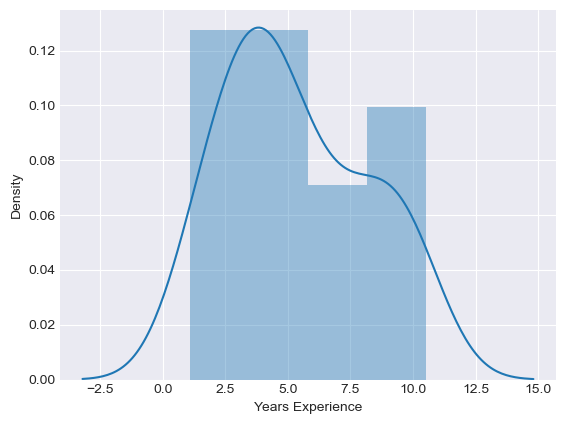

In [145]:
sns.distplot(data.YearsExperience,label='Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Density')
plt.show()

D:\DS\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


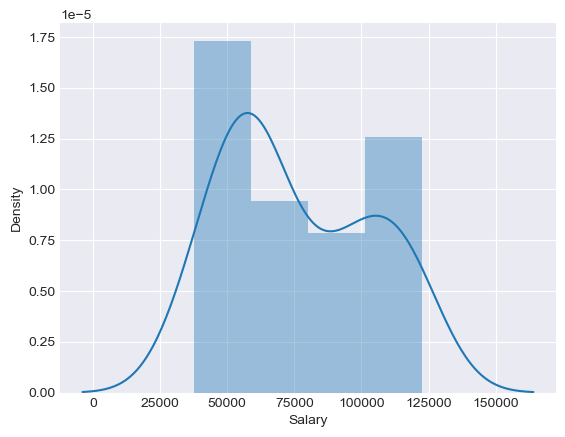

In [146]:
sns.distplot(data.Salary,label='Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

# Correlation Analysis

In [149]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


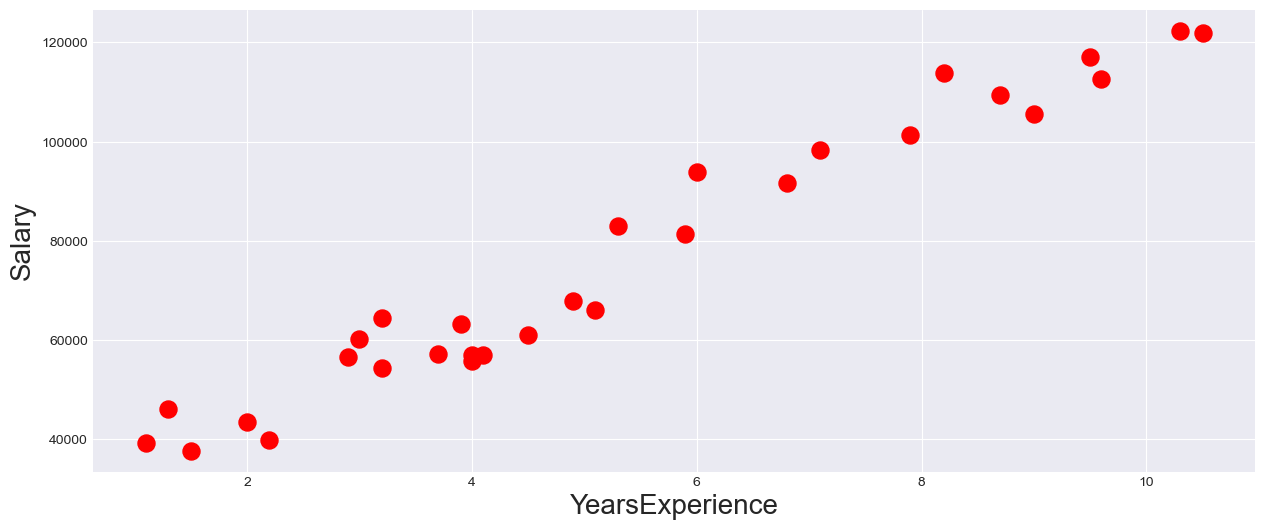

In [151]:
plt.figure(figsize=(15,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data.YearsExperience,data.Salary,s=150,color="red")
plt.xlabel("YearsExperience",size=20)
plt.ylabel("Salary",size=20)
plt.show()

# Model

In [152]:
model=LinearRegression()
model.fit(data[['YearsExperience']],data['Salary'])

LinearRegression()

In [154]:
pred=model.predict(data[['YearsExperience']]) # predicted data for 
pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [155]:
model.intercept_

25792.20019866871

In [156]:
model.coef_

array([9449.96232146])

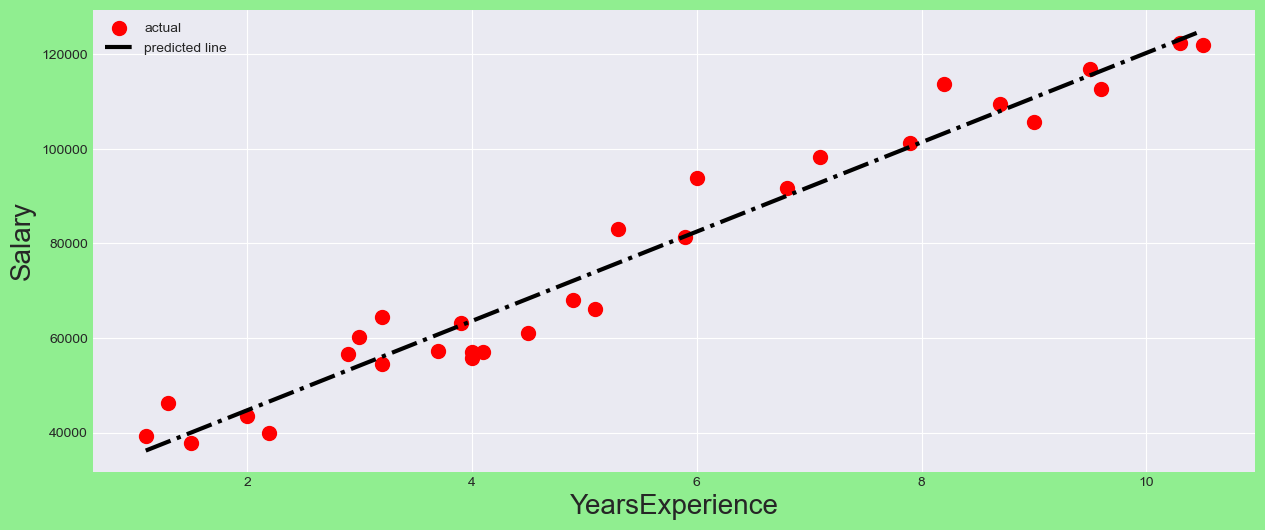

In [158]:
plt.figure(figsize=(15,6),facecolor="lightgreen")

plt.style.use("seaborn-darkgrid")
plt.scatter(data.YearsExperience,data.Salary,s=100,color="red",label="actual")
plt.plot(data.YearsExperience,pred,color="black",linestyle="-.",linewidth=3,label="predicted line") #plotting using predicted data

plt.legend(loc="best")
plt.xlabel("YearsExperience",size=20)
plt.ylabel("Salary",size=20)
plt.show()

# Evaluation

In [160]:
r2_score(data["Salary"],pred)

0.9569566641435086

# Statsmodel

In [161]:
X=data['YearsExperience'].values.reshape(-1,1)
y=data['Salary'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
pred_reg=LinearRegression()

# Model_1

In [165]:
# no transformation
model1=smf.ols("Salary~YearsExperience",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        17:31:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
X=data['YearsExperience'].values.reshape(-1,1)
y=data['Salary'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [168]:
pred_reg=LinearRegression()

In [169]:
pred_reg.fit(X_train,y_train)

LinearRegression()

In [170]:
pred_reg.intercept_

array([25321.58301178])

In [171]:
pred_reg.coef_

array([[9423.81532303]])

In [174]:
y_pred=pred_reg.predict(X_test)

In [175]:
data_pred=pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
data_pred

,Actual,Predict
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


# Model_2

In [177]:
# using Logarithmic transformation
model2=smf.ols('np.log(YearsExperience)~Salary',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Tue, 28 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                             17:36:43   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
X_log = np.log(data['YearsExperience'].values.reshape(-1,1))
y_log = data['Salary'].values.reshape(-1,1)
X_train_log,X_test_log,Y_train_log,Y_test_log = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

In [180]:
y_pred_log=LinearRegression()

In [181]:
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [182]:
y_pred_log.intercept_

array([16808.04207062])

In [183]:
y_pred_log.coef_

array([[39297.91674992]])

In [184]:
l_model= y_pred_log.predict(X_test_log)
l_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [185]:
data_pred_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
data_pred_1

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


# Model_3

In [188]:
#Exponential Transformation Model
#log(Y) =α + βX + ε
model3=smf.ols('np.log(Salary)~YearsExperience',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           7.03e-18
Time:                        17:41:03   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
X_e_log = data['YearsExperience'].values.reshape(-1,1)
y_e_log = np.log(data['Salary'].values.reshape(-1,1))

In [190]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [191]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [192]:
exp_model.intercept_

array([10.48525073])

In [193]:
exp_model.coef_

array([[0.12704681]])

In [194]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

In [195]:
data_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
data_exp

,Actual,Predict
0,11.631908,11.704900
1,11.126351,11.107780
2,11.642303,11.527035
3,11.327656,11.158599
4,11.073567,10.891801
5,10.954117,10.955324


# Model_4

In [196]:
#Quandratic transformation
model4=smf.ols('np.log(Salary)~YearsExperience+pow(YearsExperience,2)',data=data).fit() 
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.95e-18
Time:                        17:45:31   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience             0.2024      0.027      7.601      0.000       0.148       0.257
pow(YearsExperience, 2)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
data['square_YearsExperience'] = data.apply(lambda row: row.YearsExperience**2, axis =1 )
data

,YearsExperience,Salary,square_YearsExperience
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [198]:
X_q = data.iloc[:,data.columns != 'Salary']
Y_q = data.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [199]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [200]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  27285.66834967611
                        Coefficient
YearsExperience         8497.965462
square_YearsExperience    80.620847


In [202]:
y_pred_q_q = model.predict(X_test)

In [203]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
27,112635.0,116296.154089
15,67938.0,70861.405662
23,113812.0,102389.930923
17,83088.0,74589.524904
8,64445.0,55304.715307


In [204]:
#Hence model without any transformation shows good performance comparing other models